<h1 style='color:purple' align='center'>Profit Estimation of Companies</h1>


<p><b> We have a dataset containing profit of companies based on various expenses like R&D Spend, Administration Spend, Marketing Spend, and also office location. We are going to analyze this dataset and build a prediction function that can predict a profit by taking R&D Spend, 
Administration Spend, Marketing Spend, and office location as input.</b></p>

### 1. Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

<br>

### 2. Importing the Dataset

In [3]:
companies = pd.read_csv("1000_Companies.csv")

<br>

### 3. Exploring Dataset

In [4]:
# How many rows and columns means how many datapoint and attributes we have ?

print(companies.shape)

(1000, 5)


In [5]:
# How our Dataset Looks like

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<br>

### 4. Data visulisation 

#### 4.1 - Correlation Matrix

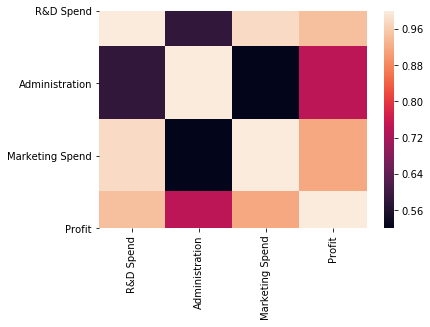

In [6]:
sns.heatmap(companies.corr())

# here corr means corrdinates
# here light diagonal means this is the highest corresponding data and that becomes darker means there is less connection
# between data

##### Conclusion : From this plot, we can say profit has a very high relationship to R&D spending and it has slightly less connection to marketing spending and even less to how much money we put into the administration.

#### 4.2 - Scatter plots

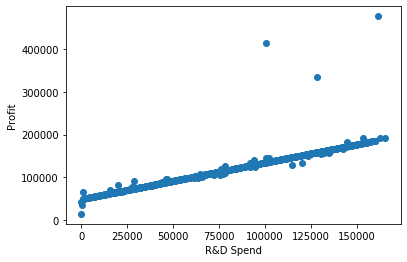

In [7]:
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.scatter(companies['R&D Spend'], companies['Profit'])


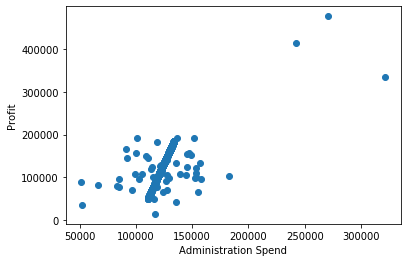

In [8]:
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.scatter(companies['Administration'], companies['Profit'])

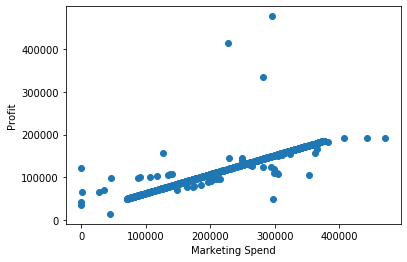

In [9]:
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.scatter(companies['Marketing Spend'] , companies['Profit'])

#### Conclusion : From Scatter plots we can see that there is a nearly linear relation between profit and all spending so we can use the linear regression algorithm to build this model.

<br>

### 5. Splitting the dataset for Model Training

In [10]:
# Extracting the Independent and Dependent variables

X = companies.iloc[: , :4].values
y = companies.iloc[: , 4].values

In [11]:
# printing dependent and independent variable

print("Independent Variables : \n\n" , X)
print("\n")
print("Dependent Variables : \n\n" , y)

Independent Variables : 

 [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]


Dependent Variables : 

 [192261.83    191792.06    191050.39    182901.99    166187.94
 156991.12    156122.51    155752.6     152211.77    149759.96
 146121.95    144259.4     141585.52    134307.35    132602.65
 129917.04    126992.93    125370.37    124266.9     122776.86
 118474.03    111313.02    110352.25    108733.99    108552.04
 107404.34    105733.54    105008.31    103282.38    101004.64
  99937.59     97483.56     97427.84     96778.92     96712.8
  96479.51     90708.19     89949.14     81229.06     81005.76
  78239.91     77798.83     71498.49     69758.98     65200.33
  64926.08     49490.75     42559.73     35673.41     14681.4
 123485.2464   82155.48418 125867.0108  104976.

In [ ]:
# old version Code

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder = LabelEncoder()
# X[:, 3] = labelencoder.fit_transform(X[:, 3])
# print(X)

# onehotencoder = OneHotEncoder(categorical_features = [3])
# X = onehotencoder.fit_transform(X).toarray()
# print(X)

In [ ]:
# New version Code 
#------------------------------------------------------

# Encoding the categorical Data
 
# In column3 of our data we have state data and to do a linear regression model it doesn't know how to process "New York". 
# It only knows how to process Number

# The first thing we gonna do is we gonna change the string into numbers.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X)

print(X)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<br>

### 6. Model Training

In [ ]:
# fitting model to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# predicting the test dataset
y_pred = regressor.predict(X_test)

In [ ]:
# finding coefficients and intercepts
print(regressor.coef_)

In [ ]:
print(regressor.intercept_)

### 7. Evaluating the model


In [ ]:
# Evaluating the model

# Calculating the R squared error
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)